In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


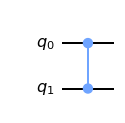

In [2]:
backend=Aer.get_backend('statevector_simulator')
oracle = QuantumCircuit(2,name='oracle')

oracle.cz(0,1)

oracle.draw()

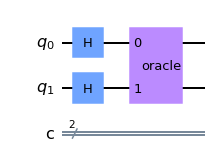

In [3]:
grover=QuantumCircuit(2,2)
grover.h([0,1])
grover.append(oracle,[0,1])

grover.draw()

In [4]:
job = execute(grover,backend)
result= job.result()
sv = result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [5]:
sv.measure

<bound method QuantumState.measure of Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))>

OPERADOR DE GROVER SEGÚN NIELSENG & CHUANG

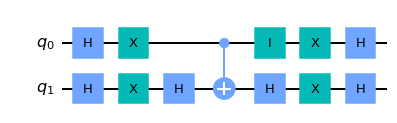

In [6]:
diffusion=QuantumCircuit(2,name='diffusion')
diffusion.h([0,1])
diffusion.x([0,1])
diffusion.h(1)
diffusion.cnot(0,1)
diffusion.i(0)
diffusion.h(1)
diffusion.x([0,1])
diffusion.h([0,1])
diffusion.draw()

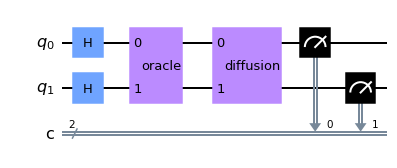

In [7]:
grover=QuantumCircuit(2,2)
grover.h([0,1])
grover.append(oracle,[0,1])
grover.append(diffusion,[0,1])
grover.measure([0,1],[0,1])
grover.draw()

In [8]:
job = execute(grover,backend,shots=1000)
result = job.result()
counts=result.get_counts()
counts

{'11': 1000}

OPERADOR DE GROVER SEGÚN QISKIT

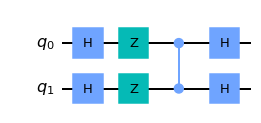

In [9]:
diffusion2=QuantumCircuit(2,name='diffusion2')
diffusion2.h([0,1])
diffusion2.z([0,1])
diffusion2.cz(0,1)
diffusion2.h([0,1])
diffusion2.draw()

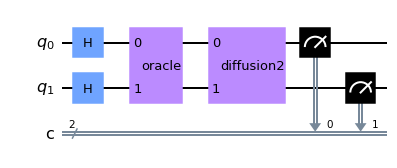

In [10]:
grover2=QuantumCircuit(2,2)
grover2.h([0,1])
grover2.append(oracle,[0,1])
grover2.append(diffusion2,[0,1])
grover2.measure([0,1],[0,1])
grover2.draw()

In [11]:
job = execute(grover2,backend)
result = job.result()
counts=result.get_counts()
counts

{'11': 1}

OPERADOR SEGÚN QISKIT SIN PUERTAS Z NI C-Z

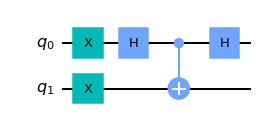

In [12]:
diffusion3=QuantumCircuit(2,name='diffusion3')
diffusion3.x([0,1])
diffusion3.h(0)
diffusion3.cnot(0,1)
diffusion3.h(0)
diffusion3.draw()

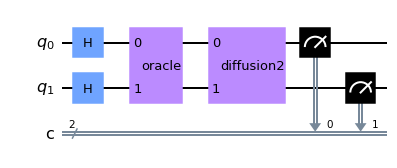

In [13]:
grover2=QuantumCircuit(2,2)
grover2.h([0,1])
grover2.append(oracle,[0,1])
grover2.append(diffusion2,[0,1])
grover2.measure([0,1],[0,1])
grover2.draw()

In [14]:
job = execute(grover2,backend)
result = job.result()
counts=result.get_counts()
counts

{'11': 1}

In [15]:
grover2=QuantumCircuit(2,2)
grover2.h([0,1])
for i in range(7):
    grover2.append(oracle,[0,1])
    grover2.append(diffusion2,[0,1])
grover2.measure([0,1],[0,1])
job = execute(grover2,backend,shots=1000)
result = job.result()
sv = result.get_statevector()
np.around(sv,2)

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [16]:
counts=result.get_counts()
counts

{'11': 1000}